### this notebook performs a kernel ridge regression with 10-fold nested cross validation

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [110]:
df_features = pd.read_csv('BASC_Features_GMDerivatives.csv')
#df_age = pd.read_csv('/home/angela/Desktop/pac2019/PAC2019_BrainAge_Training.csv')
df_age = pd.read_csv('PAC2019_BrainAge_Training.csv')
df_indices = pd.read_csv('group_indices.tsv', sep='\t',index_col=0)

In [55]:
train_ids = df_indices[df_indices.Group=='train'].index
test_ids =  df_indices[df_indices.Group=='test'].index
test_feats = pd.DataFrame(df_features[df_features.subject_ID.isin(test_ids)],
                                         copy=True)
df_features = df_features[df_features.subject_ID.isin(train_ids)]

test_age = pd.DataFrame(df_age[df_age.subject_ID.isin(test_ids)],
                       copy=True)
df_age = df_age[df_age.subject_ID.isin(train_ids)]

In [29]:
random_state = 1

In [30]:
# set the x
x_ = df_features.loc[:,'scale007_1'::].values
# set the y
y_ = df_age.loc[:,'age'].values

In [31]:
# Set up possible values of parameters to optimize over
p_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
         'kernel': ['rbf']} # I also tried linear and polynomial, but rbf was the best
# We will use kernel ridge regression
krr = KernelRidge()
# set up cross validators
inner_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
# set the parameter search classifier
clf = GridSearchCV(estimator=krr, param_grid=p_grid, scoring='neg_mean_absolute_error',
                   cv=inner_cv, refit=True)

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


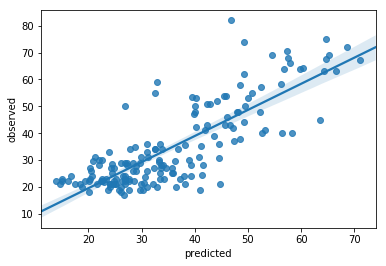

ACCURACY: rho = 0.7437804034398932, mae = 6.990856413807692


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


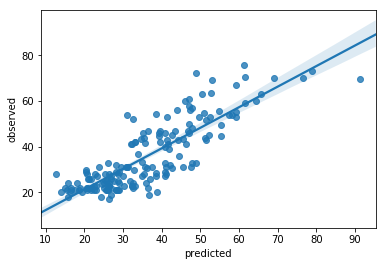

ACCURACY: rho = 0.8196221460302863, mae = 6.427217186783996


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


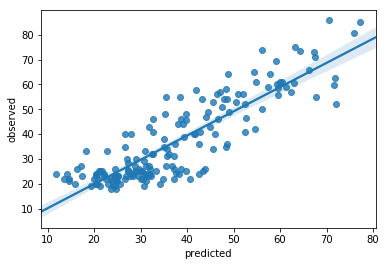

ACCURACY: rho = 0.83128280085358, mae = 6.5729628042014


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


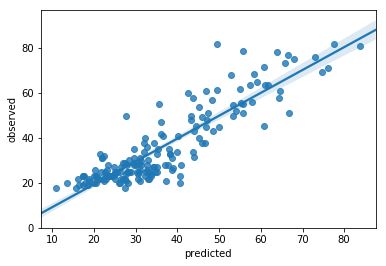

ACCURACY: rho = 0.8284514224338086, mae = 5.938886097084715


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


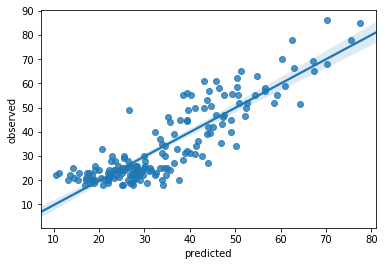

ACCURACY: rho = 0.8206408015328187, mae = 6.12624619980892


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


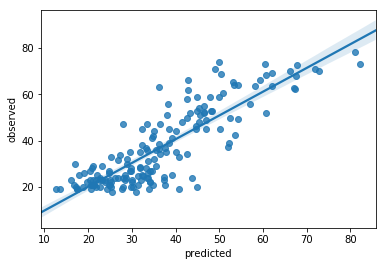

ACCURACY: rho = 0.8059034746797545, mae = 6.8708768641476805


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


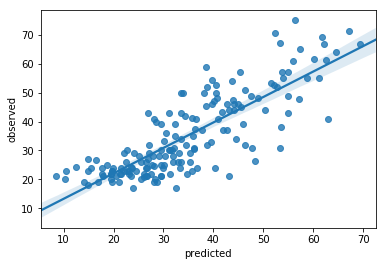

ACCURACY: rho = 0.8107293347736503, mae = 6.22219682340358


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


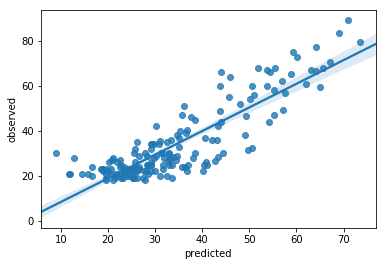

ACCURACY: rho = 0.7918951904340192, mae = 6.437325536522307


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


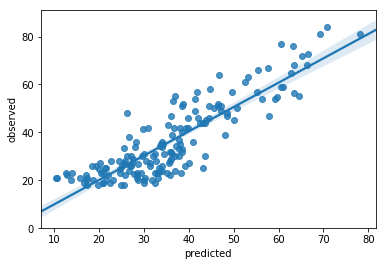

ACCURACY: rho = 0.8340650366493977, mae = 6.147994801207379


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


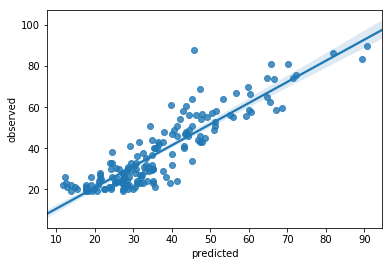

ACCURACY: rho = 0.8625425098367564, mae = 6.088983724194373


In [32]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [33]:
# note this r2 is the coefficient of determination
r2_list

[0.6536039235885831,
 0.6973726918610322,
 0.7565849517458592,
 0.785513146304849,
 0.7721696392010409,
 0.7246031143429136,
 0.6636764965312961,
 0.756590031175344,
 0.7647400709971416,
 0.7906942113266047]

In [34]:
np.mean(r2_list)

0.7365548277074663

In [35]:
mae_list

[6.990856413807692,
 6.427217186783996,
 6.5729628042014,
 5.938886097084715,
 6.12624619980892,
 6.8708768641476805,
 6.22219682340358,
 6.437325536522307,
 6.147994801207379,
 6.088983724194373]

In [36]:
np.mean(mae_list)

6.382354645116204

In [37]:
rho_list

[0.7437804034398932,
 0.8196221460302863,
 0.83128280085358,
 0.8284514224338086,
 0.8206408015328187,
 0.8059034746797545,
 0.8107293347736503,
 0.7918951904340192,
 0.8340650366493977,
 0.8625425098367564]

In [38]:
np.mean(rho_list)

0.8148913120663966

In [39]:
param_list

[{'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'},
 {'alpha': 0.001, 'kernel': 'rbf'}]

# Test

In [40]:
krr = KernelRidge(alpha=0.001, kernel='rbf')
krr.fit(x_,y_)

KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None)

In [56]:
# set the x
xtest = test_feats.loc[:,'scale007_1'::].values
# set the y
ytest = test_age.loc[:,'age'].values

In [57]:
len(ytest)

423

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


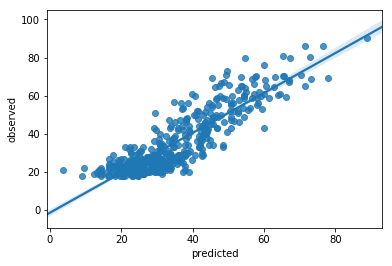

ACCURACY: rho = 0.8442698276756847, mae = 6.2090507390985, r2 = 0.7675346695583746


In [58]:
# test
y_pred = clf.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))

# ADD WM FEATURES

In [67]:
wmfeatures = pd.DataFrame(np.load('WM_features.npz')['arr_0'])
wm_ids = pd.read_csv('WM_subjIDs.tsv',sep='\t',index_col=0)
wmfeatures.index = wm_ids.subject_ID

In [69]:
wm_IDs = wmfeatures.dropna().index

In [111]:
train_overlap = set(wm_IDs) & set(df_features.subject_ID)
test_overlap = set(wm_IDs) & set(test_feats.subject_ID)

test_feats = test_feats[test_feats.subject_ID.isin(test_overlap)]
df_features = df_features[df_features.subject_ID.isin(train_overlap)]

test_age = df_age[df_age.subject_ID.isin(test_overlap)]
df_age = df_age[df_age.subject_ID.isin(train_overlap)]

In [113]:
new_test = pd.concat([test_feats.reset_index(),
                      wmfeatures.loc[test_overlap].reset_index()],
                     axis=1)
new_features = pd.concat([df_features.reset_index(),
                       wmfeatures.loc[train_overlap].reset_index()],
                      axis=1)

In [94]:
# set the x
x_ = new_features.loc[:,'scale007_1'::].drop('subject_ID',
                                             axis=1).values
# set the y
y_ = df_age.loc[:,'age'].values

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


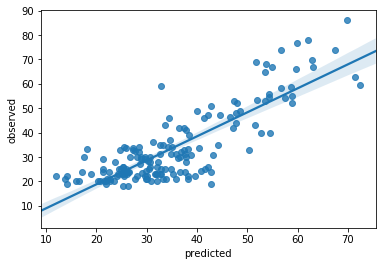

ACCURACY: rho = 0.7202077584464209, mae = 6.6524397740702765


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


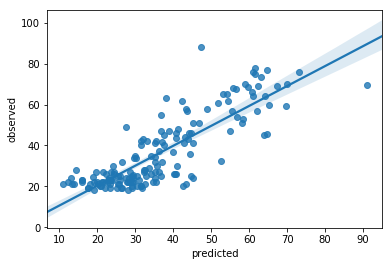

ACCURACY: rho = 0.7977086091901638, mae = 7.4764822097432875


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


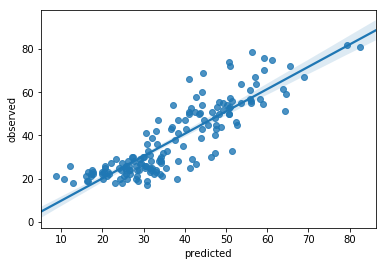

ACCURACY: rho = 0.862166956450291, mae = 6.376705181624228


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


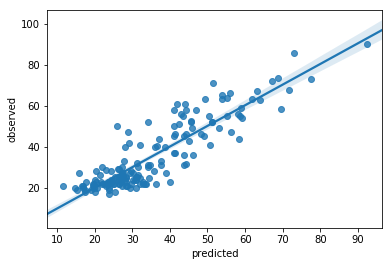

ACCURACY: rho = 0.8326153661149329, mae = 5.799108702233211


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


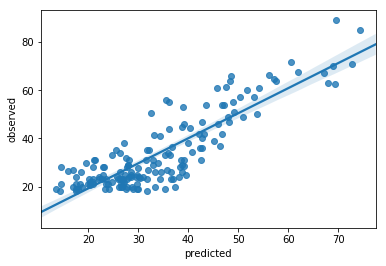

ACCURACY: rho = 0.7613302587748672, mae = 6.337467117595798


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


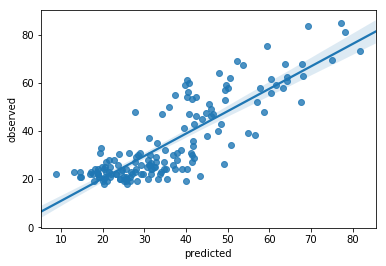

ACCURACY: rho = 0.7826974222390665, mae = 7.219200245923443


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


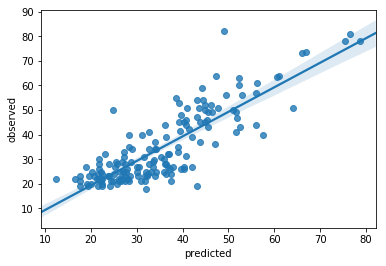

ACCURACY: rho = 0.7863801045798107, mae = 6.206015449733489


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


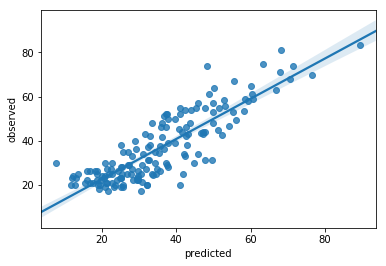

ACCURACY: rho = 0.8226578338393984, mae = 6.566191035242315


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


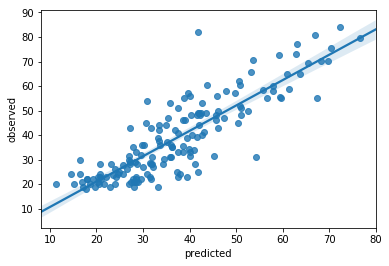

ACCURACY: rho = 0.8528466394346866, mae = 6.353017692598993


/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


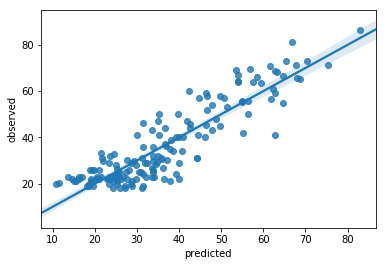

ACCURACY: rho = 0.8377232333265865, mae = 5.985331935572762


In [95]:
param_list = []
r2_list = []
mae_list = []
rho_list = []


for ind_train, ind_test in outer_cv.split(x_,y_):
    x_train, x_test = x_[ind_train], x_[ind_test]
    y_train, y_test = y_[ind_train], y_[ind_test]

#     # normalize to the training set
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_[ind_train])
#     # transform the test set(s) to same parameters as training set
#     x_test = scaler.transform(x_[ind_test])

    # train the model
    clf.fit(X=x_train, y=y_train)
    # save best parameters
    param_list.append(clf.best_params_)

    # test on held-out fold
    y_pred = clf.predict(x_test)
    # evaluate
    r2_list.append(r2_score(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    pearson_r2 = stats.pearsonr(y_pred, y_test)[0]**2
    rho = stats.spearmanr(y_pred, y_test)[0]
    rho_list.append(rho)
    
    # plot
    sns.regplot(y_pred, y_test)
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print('ACCURACY: rho = {}, mae = {}'.format(rho, mae))

In [96]:
print('mean',np.mean(r2_list))
print('mae',np.mean(mae_list))
print('rho',np.mean(rho_list))

mean 0.7347432014717918
mae 6.497195934433781
rho 0.8056334182396224


In [97]:
print(param_list)

[{'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}, {'alpha': 0.001, 'kernel': 'rbf'}]


# Test with WM

In [98]:
krr = KernelRidge(alpha=0.001, kernel='rbf')
krr.fit(x_,y_)

KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None)

In [115]:
# set the x
xtest = new_test.loc[:,'scale007_1'::].drop('subject_ID',
                                             axis=1).values
# set the y
ytest = test_age.loc[:,'age'].values

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


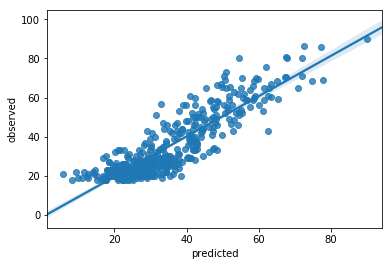

ACCURACY: rho = 0.8441543374766144, mae = 6.225281122100643, r2 = 0.769567329210793


In [116]:
# test
y_pred = clf.predict(xtest)

# evaluate
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
pearson_r2 = stats.pearsonr(y_pred, ytest)[0]**2
rho = stats.spearmanr(y_pred, ytest)[0]

# plot
sns.regplot(y_pred, ytest)
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()
print('ACCURACY: rho = {}, mae = {}, r2 = {}'.format(rho, mae, r2))